In [74]:
from LunarSolarConverter.LunarSolarConverter import LunarSolarConverter, Solar, pprint

from datetime import datetime
from datetime import timedelta  
import numpy as np
import matplotlib.pyplot as plt


In [75]:
JIN = 0
MU = 1
TU = 2
SHUI = 3
HUO = 4

gua_map = [('KUN', TU), 
           ('QIAN', JIN), 
           ('DUI', JIN), 
           ('LI', HUO), 
           ('ZHEN', MU), 
           ('XUN', MU), 
           ('KAN', SHUI), 
           ('GEN', TU)]

xiangke_map = [(JIN, MU),
               (MU, TU),
              (TU, SHUI),
              (SHUI, HUO),
              (HUO, JIN)]


def is_xiang_ke(gua1, gua2):
    wu_xing1 = gua_map[gua1][1]
    wu_xing2 = gua_map[gua2][1]
    
    for xiangke in xiangke_map:
        if wu_xing1 == xiangke[0] and wu_xing2 == xiangke[1]:
            return True
    return False
    

In [76]:
GOODTIME = 1
BADTIME = -1
SOSOTIME = 0

def check_time(year, month, day, shichen):
    solar = Solar(year, month, day)

    converter = LunarSolarConverter()
    lunar = converter.SolarToLunar(solar)
    pprint(vars(lunar))
    
    upper_gua = (lunar.lunarYear + 
                 lunar.lunarMonth + 
                 lunar.lunarDay) % 8
    
    
    lower_gua = (lunar.lunarYear + 
                 lunar.lunarMonth + 
                 lunar.lunarDay + 
                 shichen) % 8
    
    dong_yao =  (lunar.lunarYear + 
                 lunar.lunarMonth + 
                 lunar.lunarDay + 
                 shichen) % 6
    
    if dong_yao % 2 == 0:
        is_shang_yao = True
        ti = lower_gua
        yong = upper_gua
    else:
        is_shang_yao = False
        ti = upper_gua
        yong = lower_gua
        
    if is_xiang_ke(ti, yong):
        return GOODTIME
    elif is_xiang_ke(yong, ti):
        return BADTIME
    else:
        return SOSOTIME
    
    
        
        
    

In [81]:
data = np.zeros((12, 7))
tomorrow = datetime(tmp.year, tmp.month, tmp.day)
for i in range(7):
    date = datetime.now() + timedelta(days=i)
    for j in range(12):
        time_type = check_time(date.year, date.month, date.day, j)
        print("date: {} shichen:{}, time_type:{}".format(date, i, time_type))
        data[j,i] = time_type

{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 00:17:52.892621 shichen:0, time_type:0
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 00:17:52.892621 shichen:0, time_type:0
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 00:17:52.892621 shichen:0, time_type:1
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 00:17:52.892621 shichen:0, time_type:-1
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 00:17:52.892621 shichen:0, time_type:-1
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 00:17:52.892621 shichen:0, time_type:1
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 00:17:52.892621 shichen:0, time_type:0
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 00:17:52.892621 shichen:0, ti

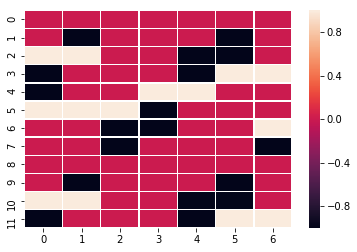

In [83]:
import seaborn as sns
ax = sns.heatmap(data, linewidth=0.5)
#plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()